In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Implementing Gradient Descent with `autograd``

In [2]:
import autograd.numpy as np
import autograd       as ag
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In this notebook we try to minimize the integral
$$ \int_x^y \sin(t^2)\, \textrm{d}t $$
with respect to the variables $x$ and $y$.  To begin with, we plot define and plot the function $g(t) = \sin(t^2)$.

Since we want to use `autograd` later, we use `numpy.sin` instead of `math.sin`.

In [3]:
def g(t):
    return np.sin(t**2)

Next, we plot the function $g(t)$.

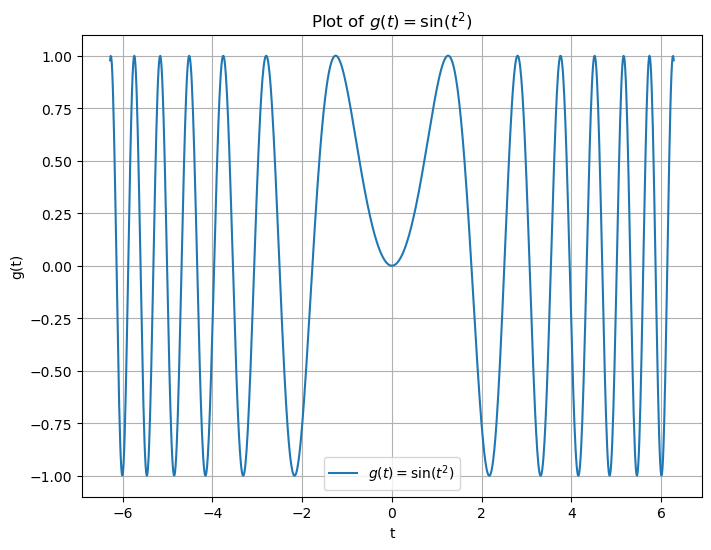

In [4]:
t = np.linspace(-2*np.pi, 2*np.pi, 1000)
gt = g(t)
plt.figure(figsize=(8, 6))
plt.plot(t, gt, label=r'$g(t) = \sin(t^2)$')
plt.title('Plot of $g(t) = \sin(t^2)$')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.legend()
plt.grid(True)
plt.show()

Since the antiderivative of the function $t \mapsto \sin(t^2)$ can not be given in finite terms, we have to use numerical integration.
We will use the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) to compute the integral 
$$\int_x^y \sin(t^2)\, \textrm{d}t.$$


In [5]:
def integral_sin_t_squared(x, y, num_trapezoids=100):
    """Estimate the integral of sin(t^2) from x to y using the trapezoidal rule."""
    width = (y - x) / num_trapezoids
    result = 0.5 * (np.sin(x**2) + np.sin(y**2))  # First and last terms
    for i in range(1, num_trapezoids):
        t = x + i * width
        result += np.sin(t**2)
    result *= width
    return result

We want to minimize the function
$$ f(x, y) := \int_x^y \sin(t^2)\, \textrm{d}t $$
with respect to $x$ and $y$ using gradient descent.  In order to compute the gradient of this function with `autograd`, we have to combine $x$ and $y$ into a pair.
To this end, we define the function `f` that takes the pair $(x, y)$ as its argument.

In [6]:
def f(xy):
    x, y = xy
    return integral_sin_t_squared(x, y)

Next, we compute the gradient of $f$.

In [7]:
grad_f = ag.grad(f)

Let us plot $f$.

In [8]:
def visualize_function():
    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-10, 10, 1000)
    x, y = np.meshgrid(x, y)
    z = f((x, y))

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Surface Plot of f(x, y)')

    plt.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

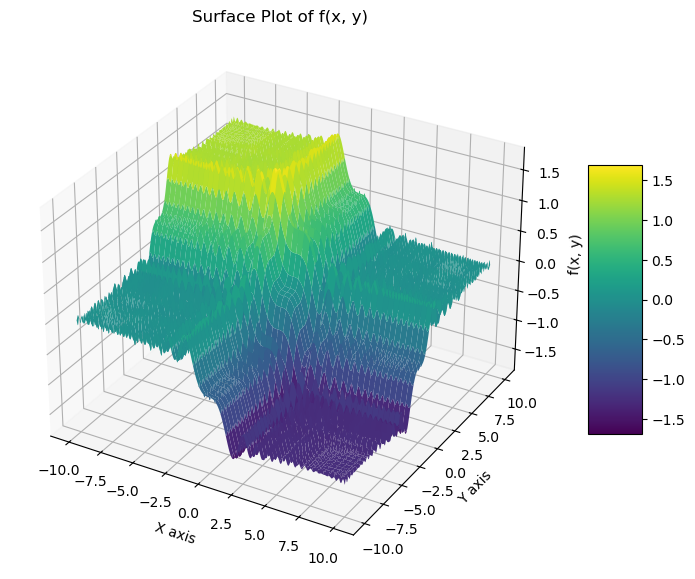

In [9]:
visualize_function()

In [10]:
def gradient_descent(grad_f, start_xy, learning_rate, num_iterations):
    xy = np.array(start_xy)
    for i in range(num_iterations):
        grad_xy = np.array(grad_f(xy))
        xy -= learning_rate * grad_xy
        if i % 10 == 0:
            print(f"Iteration {i:3d}: x = {xy[0]:.5f}, y = {xy[1]:.5f}, f(x, y) = {f(xy):.5f}")
    return xy

In [13]:
start_xy = (1.5, 2.5)  # Initial values for x and y
learning_rate  = 0.5
num_iterations = 101
final_xy = gradient_descent(grad_f, start_xy, learning_rate, num_iterations)

Iteration   0: x = 1.88906, y = 2.51652, f(x, y) = -0.43989
Iteration  10: x = 1.78022, y = 2.72194, f(x, y) = -0.35671
Iteration  20: x = 1.77302, y = 2.72224, f(x, y) = -0.35655
Iteration  30: x = 1.77248, y = 2.72224, f(x, y) = -0.35655
Iteration  40: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
Iteration  50: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
Iteration  60: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
Iteration  70: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
Iteration  80: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
Iteration  90: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
Iteration 100: x = 1.77243, y = 2.72224, f(x, y) = -0.35655


In [14]:
print(f"Final position: x = {final_xy[0]:.5f}, y = {final_xy[1]:.5f}, f(x, y) = {f(final_xy):.5f}")

Final position: x = 1.77243, y = 2.72224, f(x, y) = -0.35655
